In [16]:
import pandas as pd
import geopandas as gpd

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
trips = pd.read_csv('../data/escooters_od.csv', index_col = 'TripID')

In [3]:
trips.head()

,Duration,Distance,StartLatitude,StartLongitude,StartTime,StartNH,EndLatitude,EndLongitude,EndTime,EndNH
TripID,,,,,,,,,,
0000045c-2677-3a7d-4b73-cad99a57,3.0,0.000,38.253,-85.756,2019-06-26 19:30:00,Downtown,38.253,-85.755,2019-06-26 19:30:00,Downtown
0000487b-92e6-50d6-7569-42ed3818,5.0,0.000,38.203,-85.752,2019-09-22 14:30:00,University,38.204,-85.751,2019-09-22 14:30:00,University
00006088-2579-e0d0-6a30-a15bb878,6.0,0.330,38.259,-85.733,2019-08-21 17:30:00,Downtown,38.265,-85.739,2019-08-21 17:30:00,Northeast Core
00008c1a-899b-8596-970f-9f6bf495,6.0,0.640,38.217,-85.757,2019-07-03 11:00:00,University,38.221,-85.763,2019-07-03 11:15:00,West Core
00009301-3225-2aea-a84a-165a480a,7.0,0.599,38.215,-85.759,2019-11-22 10:45:00,University,38.222,-85.764,2019-11-22 11:00:00,West Core


In [4]:
shape = gpd.read_file('../raw_data/shapefiles/louisville.shp')

In [5]:
shape.rename(columns = {'marketCTs_': 'NH'}, inplace = True)

/usr/local/Caskroom/miniconda/base/envs/geopy/lib/python3.9/site-packages/geopandas/plotting.py:824: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.draw()
/usr/local/Caskroom/miniconda/base/envs/geopy/lib/python3.9/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


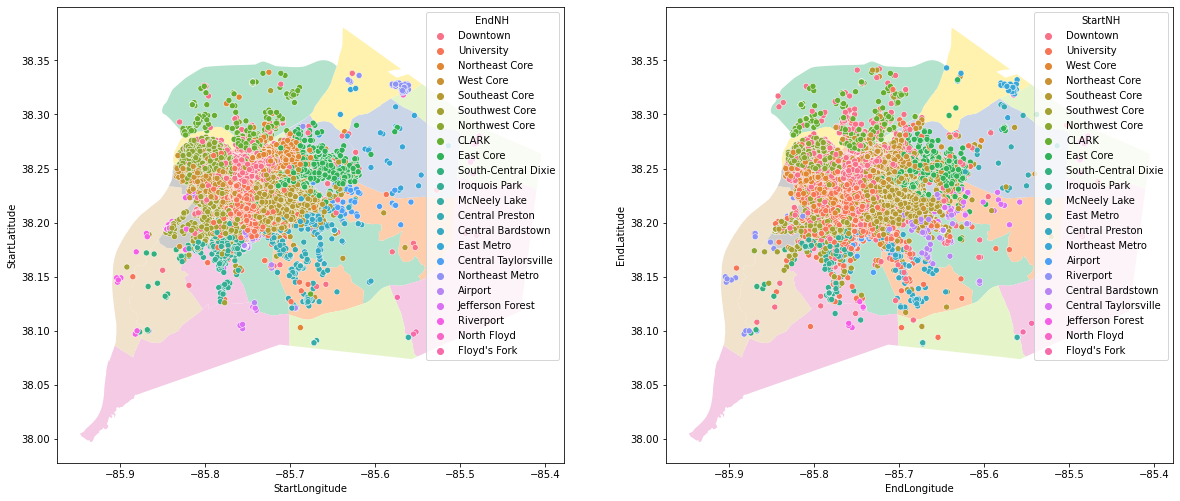

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 20))

shape.plot(ax = ax1,
           column = 'NH',
           cmap = 'Pastel2')

sns.scatterplot(data = trips,
                x = 'StartLongitude',
                y = 'StartLatitude',
                hue = 'EndNH',
                ax = ax1)

shape.plot(ax = ax2,
          column = 'NH',
          cmap = 'Pastel2')

sns.scatterplot(data = trips,
                x = 'EndLongitude',
                y = 'EndLatitude',
                hue = 'StartNH',
                ax = ax2)

plt.show()